In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report 
from sklearn import preprocessing

In [2]:
df = pd.read_csv('Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
df1 = df.copy()

In [4]:
df1 = df1.rename({'Marital.Status':'mar_sta','Taxable.Income':'tax_inc','City.Population':'city_pop','Work.Experience':'work_exp'}, axis=1)
df1

,Undergrad,mar_sta,tax_inc,city_pop,work_exp,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# taxable income <= 30000 is Risky ='0' and Taxable income>30000 is Good='1'


In [ ]:
# # df1.tax_inc = df1.tax_inc.mask(df['tax_inc']<=30000, 0)
df1['tax_inc'] = np.where(df1['tax_inc']<=30000, 0,df1['tax_inc'])
df1

In [8]:
df1[df1.tax_inc==0]

,Undergrad,mar_sta,tax_inc,city_pop,work_exp,Urban
10,NO,Single,0,102602,19,YES
12,NO,Divorced,0,148033,14,YES
16,YES,Divorced,0,34551,29,NO
19,NO,Single,0,126953,30,YES
21,YES,Divorced,0,29106,7,YES
...,...,...,...,...,...,...
544,NO,Single,0,133877,21,YES
557,YES,Married,0,157421,10,NO
567,YES,Single,0,129912,30,NO
575,NO,Divorced,0,95975,13,YES


In [9]:
df1.tax_inc = df1.tax_inc.mask(df1['tax_inc']>30000, 1)

In [10]:
df1

,Undergrad,mar_sta,tax_inc,city_pop,work_exp,Urban
0,NO,Single,1,50047,10,YES
1,YES,Divorced,1,134075,18,YES
2,NO,Married,1,160205,30,YES
3,YES,Single,1,193264,15,YES
4,NO,Married,1,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,1,39492,7,YES
596,YES,Divorced,1,55369,2,YES
597,NO,Divorced,1,154058,0,YES
598,YES,Married,1,180083,17,NO


In [12]:
df1 = pd.get_dummies(df1, columns=['Undergrad','mar_sta','Urban'])

In [13]:
df1

,tax_inc,city_pop,work_exp,Undergrad_NO,Undergrad_YES,mar_sta_Divorced,mar_sta_Married,mar_sta_Single,Urban_NO,Urban_YES
0,1,50047,10,1,0,0,0,1,0,1
1,1,134075,18,0,1,1,0,0,0,1
2,1,160205,30,1,0,0,1,0,0,1
3,1,193264,15,0,1,0,0,1,0,1
4,1,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,1,39492,7,0,1,1,0,0,0,1
596,1,55369,2,0,1,1,0,0,0,1
597,1,154058,0,1,0,1,0,0,0,1
598,1,180083,17,0,1,0,1,0,1,0


In [17]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [18]:
df1_norm =  norm_func(df1)
df1_norm.tail(10)


,tax_inc,city_pop,work_exp,Undergrad_NO,Undergrad_YES,mar_sta_Divorced,mar_sta_Married,mar_sta_Single,Urban_NO,Urban_YES
590,1.0,0.341473,0.466667,1.0,0.0,0.0,1.0,0.0,0.0,1.0
591,0.0,0.615406,0.600000,0.0,1.0,0.0,0.0,1.0,0.0,1.0
592,1.0,0.283703,0.533333,0.0,1.0,0.0,0.0,1.0,1.0,0.0
593,1.0,0.610256,0.333333,1.0,0.0,1.0,0.0,0.0,0.0,1.0
594,1.0,0.412341,0.300000,1.0,0.0,0.0,1.0,0.0,0.0,1.0
595,1.0,0.078811,0.233333,0.0,1.0,1.0,0.0,0.0,0.0,1.0
596,1.0,0.170058,0.066667,0.0,1.0,1.0,0.0,0.0,0.0,1.0
597,1.0,0.737240,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0
598,1.0,0.886810,0.566667,0.0,1.0,0.0,1.0,0.0,1.0,0.0
599,1.0,0.760683,0.533333,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [20]:
df1_norm.tax_inc.value_counts()

1.0    476
0.0    124
Name: tax_inc, dtype: int64

In [21]:
x = df1_norm.iloc[:,1:]
y= df1_norm.iloc[:,0]

In [23]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
595    1.0
596    1.0
597    1.0
598    1.0
599    1.0
Name: tax_inc, Length: 600, dtype: float64

In [22]:
x

,city_pop,work_exp,Undergrad_NO,Undergrad_YES,mar_sta_Divorced,mar_sta_Married,mar_sta_Single,Urban_NO,Urban_YES
0,0.139472,0.333333,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.622394,0.600000,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.772568,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.962563,0.500000,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.010081,0.933333,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
595,0.078811,0.233333,0.0,1.0,1.0,0.0,0.0,0.0,1.0
596,0.170058,0.066667,0.0,1.0,1.0,0.0,0.0,0.0,1.0
597,0.737240,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0
598,0.886810,0.566667,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [25]:
#Splitting the data set
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=40)

In [26]:
#Building the Model
model = DecisionTreeClassifier(criterion ='entropy', max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

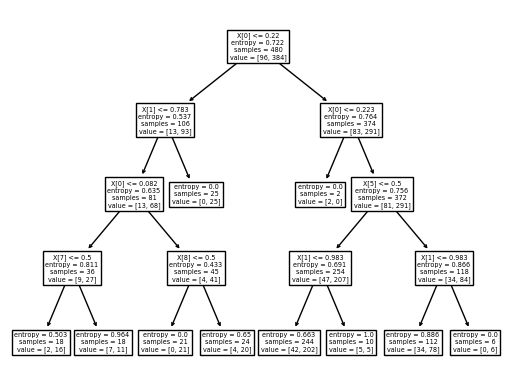

In [28]:
tree.plot_tree(model);

In [33]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

1.0    118
0.0      2
dtype: int64

In [34]:
preds

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [36]:
pd.crosstab(y_test,preds)

col_0,0.0,1.0
tax_inc,,
0.0,1,27
1.0,1,91


In [38]:
#accuracy
np.mean(preds==y_test)

0.7666666666666667

# CART using Gini Criteria 

In [39]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=4)


In [40]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [41]:
#Prediction and accuracy 
pred = model.predict(x_test)

In [42]:
pd.crosstab(y_test, pred)

col_0,0.0,1.0
tax_inc,,
0.0,1,27
1.0,1,91


In [44]:
np.mean(pred==y_test)

0.7666666666666667

# Decision Tree Regressor 


In [46]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
X = df1_norm.iloc[:,1:]
Y = df1_norm.iloc[:,0]

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=1)

In [49]:
model1 = DecisionTreeRegressor()
model1.fit(X_train, Y_train)

DecisionTreeRegressor()

In [50]:
pred1 = model1.predict(X_test)

In [52]:
#Accuracy 
model1.score(X_test, Y_test)

-1.3263888888888884